In [1]:
%matplotlib inline
import requests 
import time
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nasdaq_data = pd.read_csv("Resources/Nasdaq_data.csv")
nasdaq_data.head()

,Ticker number,Tickers,Volume,Volume Weighted Average,Open Price,Close Price,Max Price,Lowest Price,Unix Time,Number of Transactions
0,0,A,"[1167918.0, 2766601.0, 1285102.0, 1977714.0, 1...","[136.1719, 138.2767, 138.014, 138.9244, 134.7575]","[134, 136.21, 137.63, 138.01, 137.85]","[136.82, 139.12, 138.14, 139.29, 134.18]","[136.85, 139.393, 139.79, 140.1997, 137.955]","[133.611, 136.21, 137.01, 137.65, 133.4482]","[1647489600000, 1647576000000, 1647835200000, ...","[21028, 25832, 26403, 25031, 24941]"
1,1,AA,"[8423152.0, 7681594.0, 9901007.0, 6100540.0, 6...","[79.8477, 81.3834, 90.1853, 89.7857, 93.9962]","[77.98, 80.52, 85.57, 89.98, 91.49]","[80.73, 82.44, 90.69, 89.88, 94.22]","[81.72, 82.7, 92.11, 91.563, 95.79]","[77.02, 79.21, 85.3001, 88.52, 91.02]","[1647489600000, 1647576000000, 1647835200000, ...","[84021, 58832, 98755, 60314, 68026]"
2,2,AAC,"[31136, 37062, 263038, 558167, 2017339.0]","[9.755, 9.7697, 9.7601, 9.7911, 9.78]","[9.75, 9.75, 9.77, 9.76, 9.76]","[9.76, 9.77, 9.76, 9.77, 9.78]","[9.765, 9.775, 9.77, 9.82, 9.78]","[9.75, 9.75, 9.75, 9.755, 9.76]","[1647489600000, 1647576000000, 1647835200000, ...","[156, 88, 184, 579, 66]"
3,3,AACG,"[45100, 39786, 42483, 82018, 165934]","[1.4174, 1.4127, 1.4253, 1.3694, 1.5117]","[1.36, 1.45, 1.48, 1.27, 1.36]","[1.38, 1.43, 1.415, 1.39, 1.46]","[1.42, 1.45, 1.49, 1.43, 1.65]","[1.31, 1.3801, 1.4, 1.27, 1.36]","[1647489600000, 1647576000000, 1647835200000, ...","[297, 182, 160, 271, 456]"
4,4,AACI,"[6003, 1370, 705]","[9.8395, 9.855, 9.8314]","[9.83, 9.9, 9.84]","[9.84, 9.85, 9.83]","[9.84, 9.9, 9.84]","[9.83, 9.85, 9.83]","[1647835200000, 1647921600000, 1648008000000]","[13, 7, 3]"


In [3]:
Nasdaq_dataframe = []
for i in range(len(nasdaq_data)):
    ticker = nasdaq_data["Tickers"][i]

    volume_list = nasdaq_data["Volume"][i].strip('][').split(', ') # Convert strings of lists to list
    volume_weighted_average_list = nasdaq_data["Volume Weighted Average"][0].strip('][').split(', ')
    open_price_list = nasdaq_data["Open Price"][i].strip('][').split(', ')
    close_price_list = nasdaq_data["Close Price"][i].strip('][').split(', ')
    max_price_list = nasdaq_data["Max Price"][i].strip('][').split(', ')
    lowest_price_list = nasdaq_data["Lowest Price"][i].strip('][').split(', ')
    unix_time_list = nasdaq_data["Unix Time"][i].strip('][').split(', ')
    number_of_transactions_list = nasdaq_data["Number of Transactions"][i].strip('][').split(', ')
    Week_Performance_list = []

    for j in range(len(volume_list)): # Convert data type for each string in the list
        volume_list[j] = int(float(volume_list[j]))
        volume_weighted_average_list[j] = float(volume_weighted_average_list[j])
        open_price_list[j] = float(open_price_list[j])
        close_price_list[j] = float(close_price_list[j])
        max_price_list[j] = float(max_price_list[j])
        lowest_price_list[j] = float(lowest_price_list[j])
        unix_time_list[j] = int(float(unix_time_list[j]) / 1000)
        Week_Performance_list.append((close_price_list[j] - open_price_list[j])/open_price_list[j])
        unix_time_list[j] = dt.datetime.fromtimestamp(unix_time_list[j])

    # Create metrics
    if len(Week_Performance_list) > 4:
        Monday_Performance = Week_Performance_list[0]
        Monday_Volume = number_of_transactions_list[0]    

        Tuesday_Performance = Week_Performance_list[1]
        Tuesday_Volume = number_of_transactions_list[1]    

        Wednesday_Performance = Week_Performance_list[2]
        Wednesday_Volume = number_of_transactions_list[2]    

        Thursday_Performance = Week_Performance_list[3]
        Thursday_Volume = number_of_transactions_list[3]    

        Friday_Performance = Week_Performance_list[4]
        Friday_Volume = number_of_transactions_list[4]

        Week_Performance = (close_price_list[4] - open_price_list[0])/open_price_list[0]
        Weekly_Volume = Monday_Volume + Tuesday_Volume + Wednesday_Volume + Thursday_Volume + Friday_Volume
        Week_High = max(max_price_list)
        Week_Low = min(lowest_price_list)
        Best_Day = max(Week_Performance_list)
        Worst_Day = min(Week_Performance_list)
        
    elif len(Week_Performance_list) > 3:
        Monday_Performance = Week_Performance_list[0]
        Monday_Volume = number_of_transactions_list[0]    

        Tuesday_Performance = Week_Performance_list[1]
        Tuesday_Volume = number_of_transactions_list[1]    

        Wednesday_Performance = Week_Performance_list[2]
        Wednesday_Volume = number_of_transactions_list[2]    

        Friday_Performance = Week_Performance_list[3]
        Friday_Volume = number_of_transactions_list[3]

        Week_Performance = (close_price_list[3] - open_price_list[0])/open_price_list[0]
        Weekly_Volume = Monday_Volume + Tuesday_Volume + Wednesday_Volume + Friday_Volume
        Week_High = max(max_price_list)
        Week_Low = min(lowest_price_list)
        Best_Day = max(Week_Performance_list)
        Worst_Day = min(Week_Performance_list)
        
    elif len(Week_Performance_list) > 2:
        Monday_Performance = Week_Performance_list[0]
        Monday_Volume = number_of_transactions_list[0]    

        Wednesday_Performance = Week_Performance_list[1]
        Wednesday_Volume = number_of_transactions_list[1]    

        Friday_Performance = Week_Performance_list[2]
        Friday_Volume = number_of_transactions_list[2]

        Week_Performance = (close_price_list[2] - open_price_list[0])/open_price_list[0]
        Weekly_Volume = Monday_Volume + Wednesday_Volume + Friday_Volume
        Week_High = max(max_price_list)
        Week_Low = min(lowest_price_list)
        Best_Day = max(Week_Performance_list)
        Worst_Day = min(Week_Performance_list) 
        
    elif len(Week_Performance_list) > 1:
        Monday_Performance = Week_Performance_list[0]
        Monday_Volume = number_of_transactions_list[0]    

        Friday_Performance = Week_Performance_list[1]
        Friday_Volume = number_of_transactions_list[1]

        Week_Performance = (close_price_list[1] - open_price_list[0])/open_price_list[0]
        Weekly_Volume = Monday_Volume + Friday_Volume
        Week_High = max(max_price_list)
        Week_Low = min(lowest_price_list)
        Best_Day = max(Week_Performance_list)
        Worst_Day = min(Week_Performance_list) 
        
    else:
        Week_Performance = Week_Performance_list[0]
        Weekly_Volume = number_of_transactions_list[0]
        Week_High = max_price_list[0]  
        Week_Low = Week_High
        Best_Day = Week_High
        Worst_Day = Week_High
     
    Nasdaq_dataframe.append({"Ticker": ticker, # Append Nasdaq data
                             "Week's Performance": Week_Performance,
                             "Highest Price": Week_High,
                             "Lowest Price": Week_Low,
                             "Best Day": Best_Day,
                             "Worst Day": Worst_Day,
                             "Week's Volume": Weekly_Volume})

In [4]:
Nasdaq_dataframe = pd.DataFrame(Nasdaq_dataframe).sort_values(by = "Week's Performance", ascending=False)

# Format the columns.
#Nasdaq_dataframe["Week's Performance"] = Nasdaq_dataframe["Week's Performance"].map("{:.3%}".format)
#Nasdaq_dataframe["Highest Price"] = Nasdaq_dataframe["Highest Price"].map("${:.2f}".format)
#Nasdaq_dataframe["Lowest Price"] = Nasdaq_dataframe["Lowest Price"].map("${:.2f}".format)
#Nasdaq_dataframe["Best Day"] = Nasdaq_dataframe["Best Day"].map("{:.3%}".format)
#Nasdaq_dataframe["Worst Day"] = Nasdaq_dataframe["Worst Day"].map("{:.3%}".format)
#Nasdaq_dataframe = Nasdaq_dataframe.loc[(int(Ticker) >= 2000000 for Ticker in Nasdaq_dataframe["Week's Volume"])]

Nasdaq_dataframe.head()

,Ticker,Week's Performance,Highest Price,Lowest Price,Best Day,Worst Day,Week's Volume
5068,NRSNW,3.675810,1.9500,0.1600,2.286663,-0.400000,925705314131186
5067,NRSN,2.517007,8.1800,1.4000,1.857798,-0.100870,19597457027710003880332
3555,HYACW,1.774695,0.5295,0.1802,1.663707,0.006358,87272039
6862,TCACW,1.259259,0.3102,0.1350,0.550551,-0.004894,12528
330,ALLG,1.202484,23.9100,7.4250,0.703170,-0.098019,2282821048486616810305879


In [5]:
Smallest_Winners = Nasdaq_dataframe.loc[(Nasdaq_dataframe["Week's Performance"] >= 0)]
 
Smallest_Winners.tail()

,Ticker,Week's Performance,Highest Price,Lowest Price,Best Day,Worst Day,Week's Volume
3138,GNFT,0.0,4.12,3.5651,0.062827,-0.012953,145248379115285
2372,ENERU,0.0,10.10,10.0300,0.001994,0.000000,811
1550,CLAS,0.0,9.81,9.7600,0.000000,-0.002039,69248010
5274,OMEG,0.0,9.80,9.7801,0.001012,0.000000,5911
2697,FINW,0.0,18.50,16.6500,0.019473,-0.035938,932186710241092413


In [6]:
Smallest_Loosers = Nasdaq_dataframe.loc[(Nasdaq_dataframe["Week's Performance"] < 0)
                                       ].sort_values(by = "Week's Performance")

Smallest_Loosers.head()

,Ticker,Week's Performance,Highest Price,Lowest Price,Best Day,Worst Day,Week's Volume
7432,VLON,-0.704324,7.770000,2.0800,0.069444,-0.051948,171117123645969615197
6868,TCBPW,-0.555529,0.850000,0.3419,-0.055500,-0.388235,118141346
6502,SLVRW,-0.474869,0.399900,0.1500,0.400000,-0.001350,1133
3381,HHGCW,-0.468918,0.320101,0.1602,0.000000,-0.379258,10311102
2679,FHLTW,-0.454545,0.550000,0.2501,0.000000,-0.347455,4512516


In [7]:

#plt.scatter(Nasdaq_dataframe["Highest Price"], Nasdaq_dataframe["Lowest Price"], 
            #s = [float(ticker) for ticker in Nasdaq_dataframe["Week's Volume"]])

In [8]:
# Remove outliers

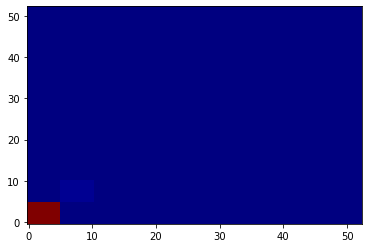

In [9]:
plt.hist2d(Nasdaq_dataframe["Best Day"], Nasdaq_dataframe["Worst Day"], bins=(10, 10), cmap=plt.cm.jet)
plt.show()

plt.show()